# Import

In [1]:
import numpy as np
import pandas as pd

In [2]:
# visualization

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Function

In [3]:
def bar_chart(list1, list2):
    objects = list1
    y_pos = np.arange(len(objects))
    performance = list2
 
    plt.figure(figsize=(20,10))    
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Number') 
    plt.show()
    
    return 0

# Data

In [4]:
df = pd.read_csv('offenses.csv')

In [5]:
df = df.drop('Unnamed: 0',1)
df = df.drop('Unnamed: 0.1',1)

In [6]:
df.head()

,DAY_OF_WEEK,DISTRICT,HOUR,Lat,Long,MONTH,OCCURRED_ON_DATE,OFFENSE_CODE_GROUP,REPORTING_AREA,SHOOTING,...,Day,Night,ToNight,ToDay,DAY,temperatureMin,temperatureMax,precipitation,snow,temperatureDifference
0,Sunday,2.0,6,42.346381,-71.103794,7,2012-07-08 06:00:00,Residential Burglary,629.0,0.0,...,1,0,16,0,8,30.0,45.0,0.0,0.0,15.0
1,Sunday,1.0,6,42.316841,-71.074585,7,2012-07-08 06:03:00,Aggravated Assault,327.0,1.0,...,1,0,16,0,8,30.0,45.0,0.0,0.0,15.0
2,Sunday,2.0,6,42.342841,-71.096990,7,2012-07-08 06:26:00,Robbery,625.0,0.0,...,1,0,16,0,8,30.0,45.0,0.0,0.0,15.0
3,Sunday,1.0,6,42.316441,-71.065829,7,2012-07-08 06:56:00,Other,258.0,0.0,...,1,0,16,0,8,30.0,45.0,0.0,0.0,15.0
4,Sunday,9.0,7,42.270516,-71.119900,7,2012-07-08 07:15:00,Robbery,496.0,0.0,...,1,0,15,0,8,30.0,45.0,0.0,0.0,15.0


In [42]:
df.columns

Index(['DAY_OF_WEEK', 'DISTRICT', 'HOUR', 'Lat', 'Long', 'MONTH',
       'OCCURRED_ON_DATE', 'OFFENSE_CODE_GROUP', 'REPORTING_AREA', 'SHOOTING',
       'UCR_PART', 'YEAR', 'Day', 'Night', 'ToNight', 'ToDay', 'DAY',
       'temperatureMin', 'temperatureMax', 'precipitation', 'snow',
       'temperatureDifference'],
      dtype='object')

# DAY_OF_WEEK

In [43]:
day_of_week = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')

In [44]:
i = 0
day_number = list()

while i < 7:
    day_number.append(len(df.loc[df['DAY_OF_WEEK'] == day_of_week[i]]))
    
    i +=1


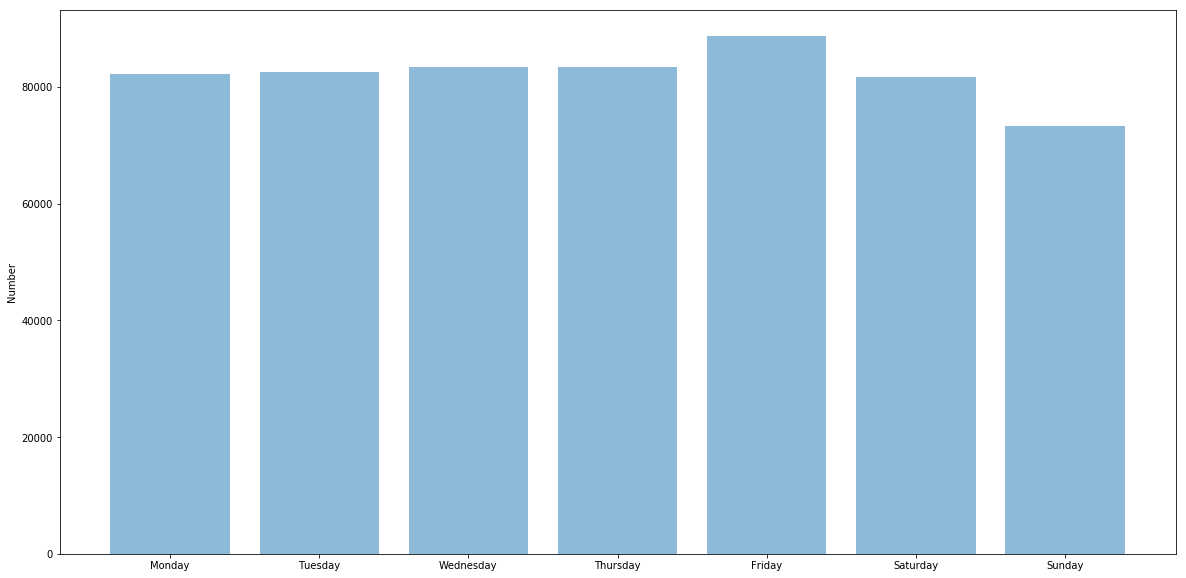

0

In [45]:
bar_chart(day_of_week, day_number)

# DISTRICT

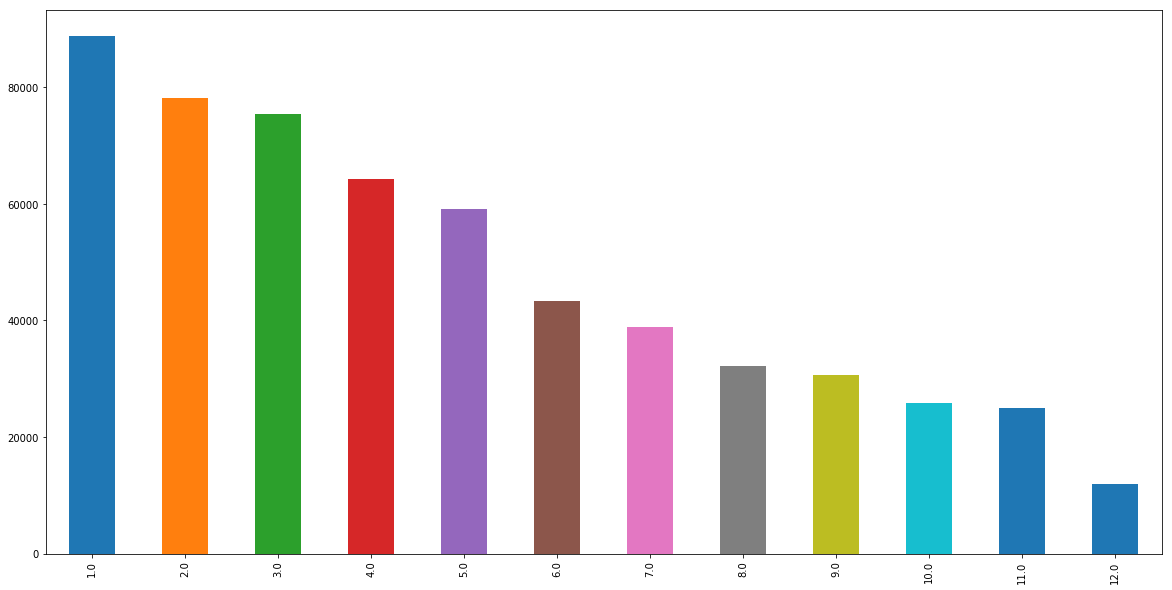

In [46]:
plt.figure(figsize=(20,10))
df['DISTRICT'].value_counts().plot.bar()
plt.show()

# HOUR

In [47]:
i = 0
hour_number = list()

while i < 24:
    hour_number.append(len(df.loc[df['HOUR'] == i]))
    i +=1

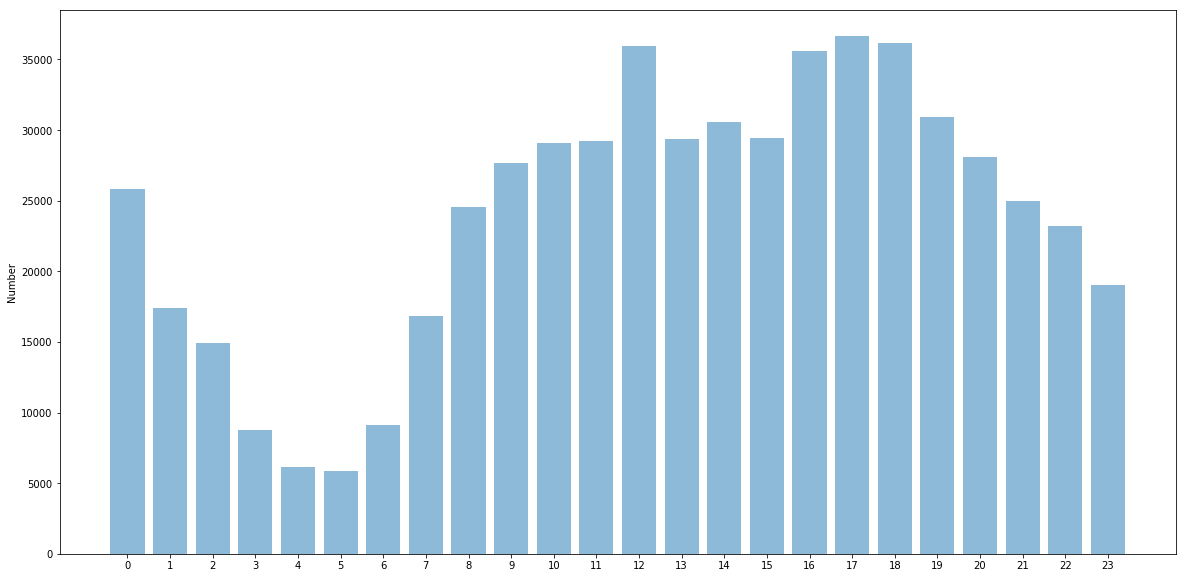

0

In [48]:
bar_chart(list(range(0,24)), hour_number)

# MONTH

In [49]:
i = 1
list_month = list()

while i <= 12:
    list_month.append(len(df.loc[df['MONTH'] == i]))
    i+=1

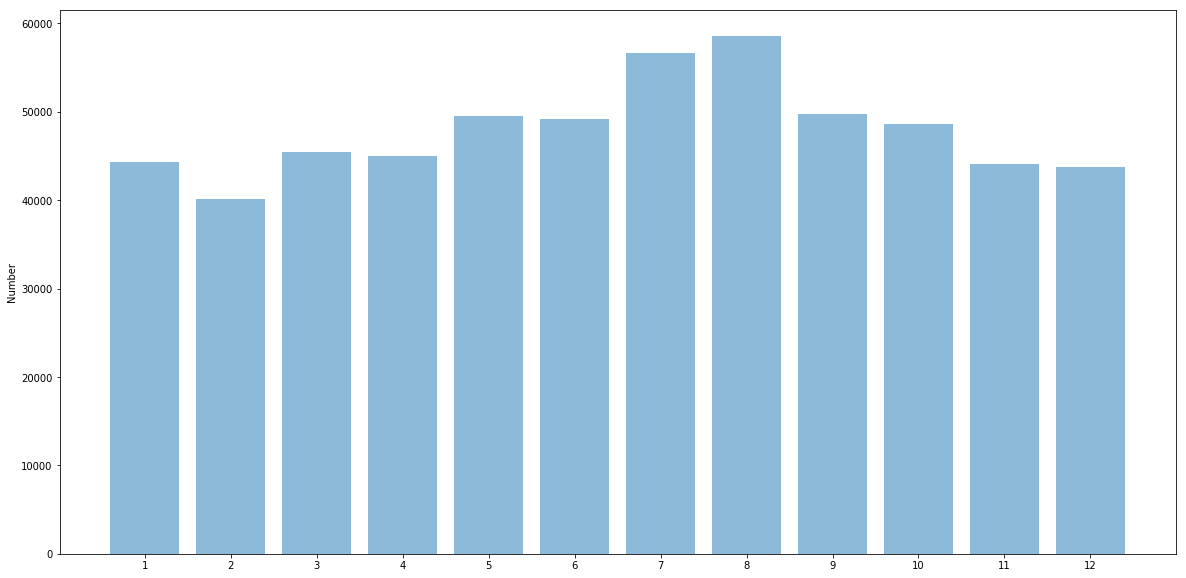

0

In [50]:
bar_chart(list(range(1,13)), list_month)

# REPORTING_AREA

In [51]:
len(df.REPORTING_AREA.unique())

887

###### It is difficult for visualization

# SHOOTING

In [52]:
df.SHOOTING.value_counts()

0.0    573275
1.0      1951
Name: SHOOTING, dtype: int64

###### Not enough data for visualization

# OFFENSE_CODE_GROUP

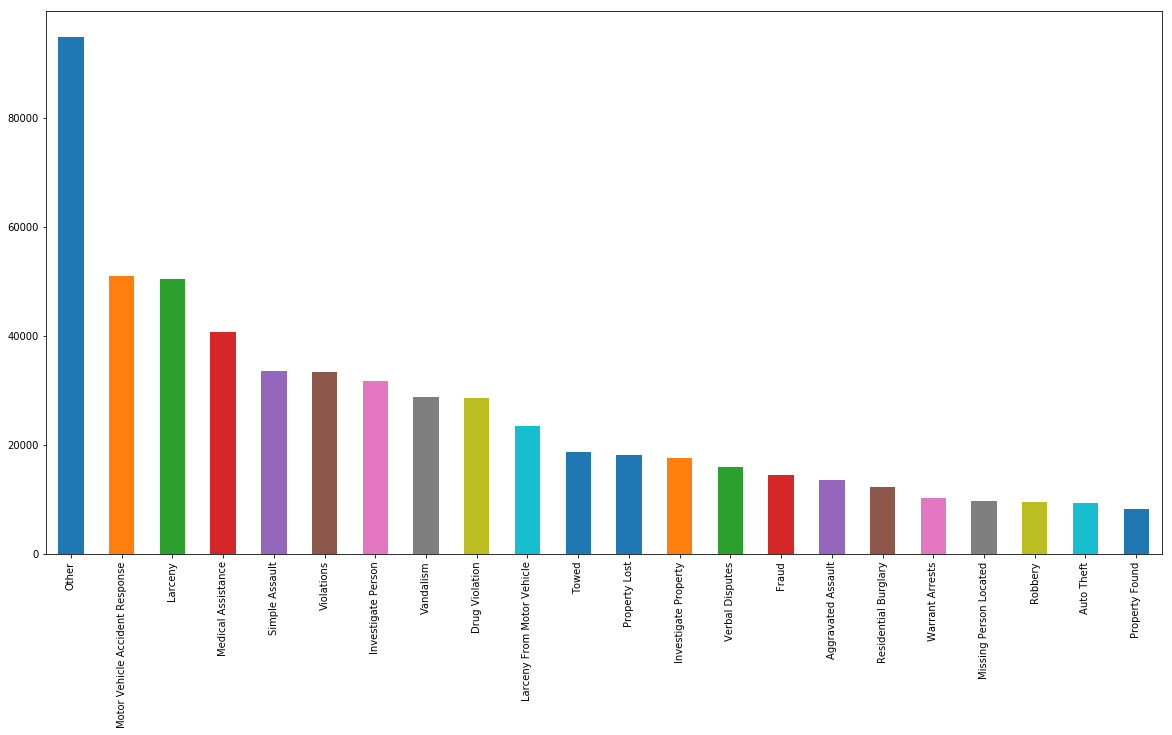

In [53]:
plt.figure(figsize=(20,10))
df.OFFENSE_CODE_GROUP.value_counts().plot.bar()
plt.show()

# OCCURRED_ON_DATE

In [54]:
df.OCCURRED_ON_DATE = pd.to_datetime(df.OCCURRED_ON_DATE)

In [55]:
df.OCCURRED_ON_DATE.describe()

count                  575226
unique                 403402
top       2013-04-15 14:50:00
freq                       96
first     2012-07-08 06:00:00
last      2018-09-03 21:25:00
Name: OCCURRED_ON_DATE, dtype: object

# Lat & Long

In [19]:
location = df[['Lat','Long']]
location = location.dropna()

location = location.loc[(location['Lat']>40) & (location['Long'] < -60)]

In [20]:
x = location['Long']
y = location['Lat']

/home/oleksandr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/oleksandr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/oleksandr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/oleksandr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


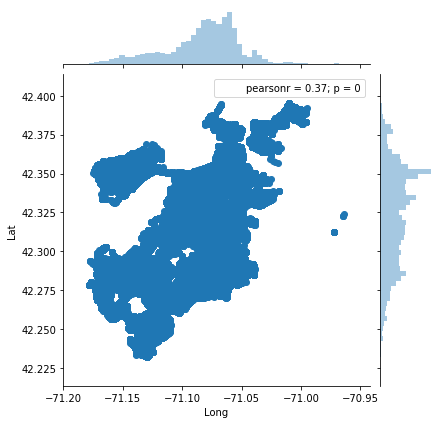

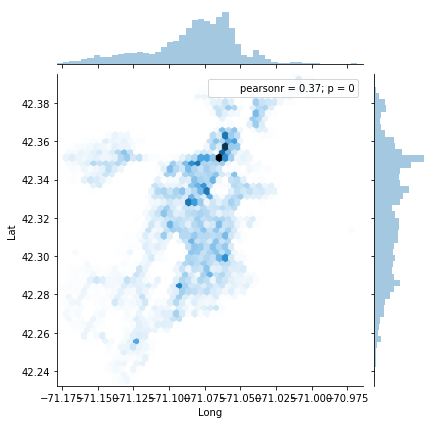

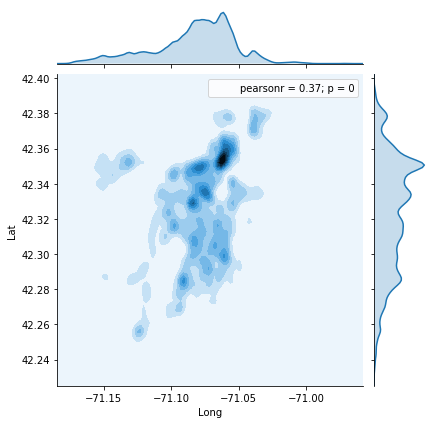

In [21]:
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”

sns.jointplot(x, y, kind='scatter')
sns.jointplot(x, y, kind='hex')
sns.jointplot(x, y, kind='kde')

# UCR_PART

In [ ]:
plt.figure(figsize=(20,10))
df.UCR_PART.value_counts().plot.bar()
plt.show()

# YEAR

In [15]:
(101023*100)/87052 - 100

16.04902816707255

In [11]:
df.YEAR.value_counts()

2017    101023
2016     99258
2015     90866
2014     88058
2013     87052
2018     65783
2012     43186
Name: YEAR, dtype: int64

In [ ]:
plt.figure(figsize=(20,10))
df.YEAR.value_counts().plot.bar()
plt.show()

In [7]:
df_year = df.loc[
    (df.YEAR == 2013) | (df.YEAR == 2014) | (df.YEAR == 2015) | (df.YEAR == 2016) | (df.YEAR == 2017)
]

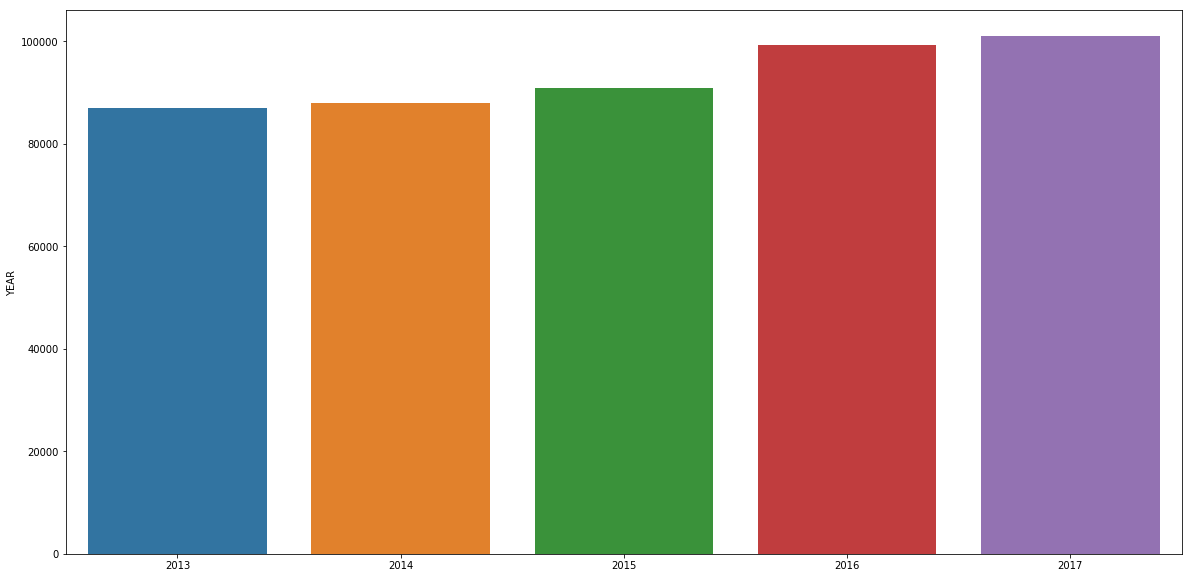

In [10]:
plt.figure(figsize=(20,10))
sns.barplot(x=df_year.YEAR.value_counts().index, y=df_year.YEAR.value_counts())

# DAY

In [16]:
i = 1
day_number = list()

while i <= 31:
    day_number.append(len(df.loc[df['DAY'] == i]))
    i +=1

In [ ]:
bar_chart(list(range(1,32)), day_number)

# Day

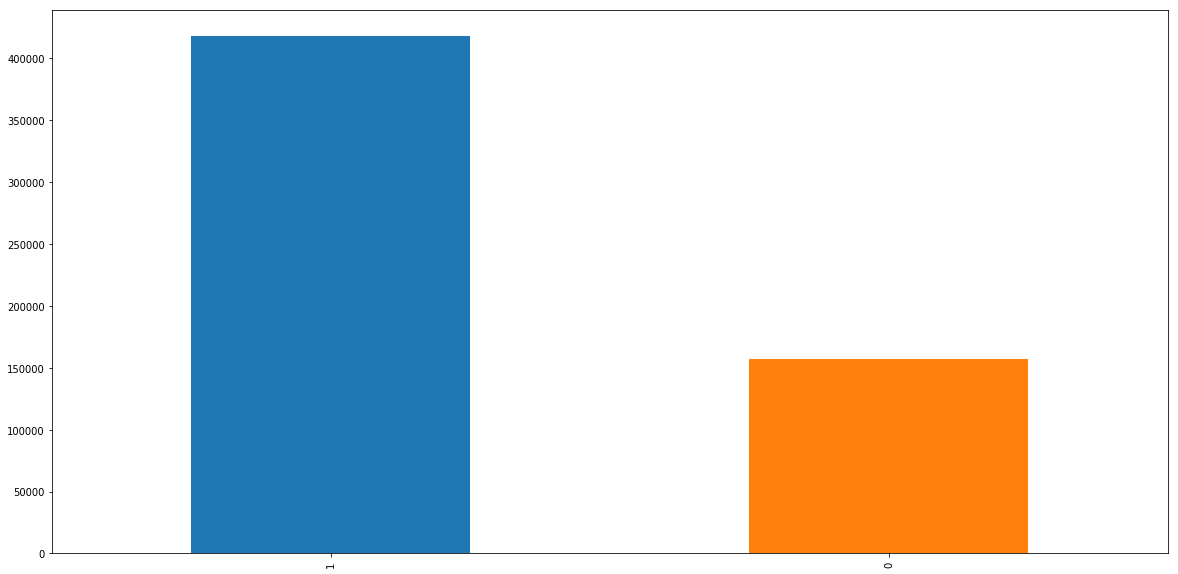

In [17]:
plt.figure(figsize=(20,10))
df.Day.value_counts().plot.bar()
plt.show()

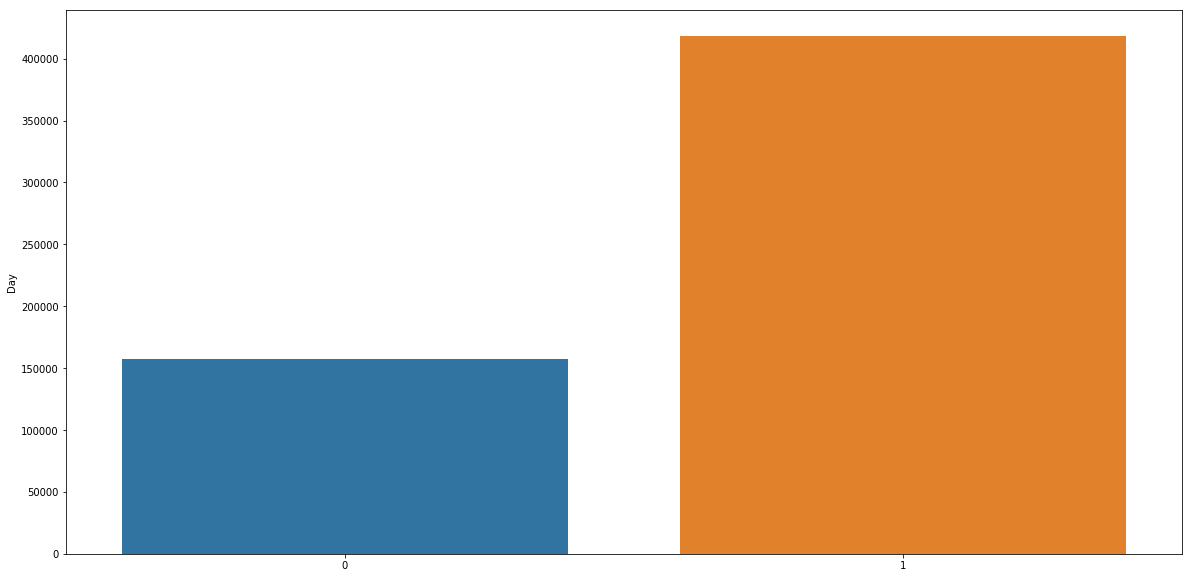

In [18]:
plt.figure(figsize=(20,10))
sns.barplot(x=df.Day.value_counts().index, y=df.Day.value_counts())

# Night

In [ ]:
plt.figure(figsize=(20,10))
df.Night.value_counts().plot.bar()
plt.show()

# ToNight

In [ ]:
plt.figure(figsize=(20,10))
df.ToNight.value_counts().plot.bar()
plt.show()

# ToDay 

In [ ]:
plt.figure(figsize=(20,10))
df.ToDay.value_counts().plot.bar()
plt.show()

# temperatureMin

In [ ]:
df.temperatureMin.describe()

# temperatureMax

In [ ]:
df.temperatureMax.describe()

# temperatureDifference

In [ ]:
df.temperatureDifference.describe()

# precipitation

In [ ]:
df.precipitation.describe()

# snow

In [ ]:
df.snow.describe()